# Binary_c and python example notebook
The following notebook servers as an example of how the binary_c python wrapper works and how it could be used.

By: David Hendriks 30 nov 2019

In [16]:
import binarycpython
import binary_c_python_api

## Core api wrapper functions:

### run_binary()


In [17]:
m1 = 15.0  # Msun
m2 = 14.0  # Msun
separation = 0  # 0 = ignored, use period
orbital_period = 4530.0  # days
eccentricity = 0.0
metallicity = 0.02
max_evolution_time = 15000 # You need to set this!

argstring = "binary_c M_1 {0:g} M_2 {1:g} separation {2:g} orbital_period {3:g} eccentricity {4:g} metallicity {5:g} max_evolution_time {6:g}  ".format(
    m1,
    m2,
    separation,
    orbital_period,
    eccentricity,
    metallicity,
    max_evolution_time,
)

output = binary_c_python_api.run_binary(argstring)

print("\n\nBinary_c output:\n\n")
print('\n'.join(output.split('\n')[:10]))



Binary_c output:


example_header_1 time=0 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 0 15 14 1 1 3540.3 0
INITIAL_GRID 15 14 4530 0.02 1 0
example_header_1 time=0 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 0 15 14 1 1 3540.3 0
INITIAL_GRID 15 14 4530 0.02 1 0
example_header_1 time=1e-07 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 1e-07 15 14 1 1 3540.3 0
example_header_1 time=2e-07 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 2e-07 15 14 1 1 3540.3 0


### run_binary_with_log

In [18]:
import tempfile
import os

m1 = 15.0  # Msun
m2 = 14.0  # Msun
separation = 0  # 0 = ignored, use period
orbital_period = 4530.0  # days
eccentricity = 0.0
metallicity = 0.02
max_evolution_time = 15000 # You need to set this!
log_filename=tempfile.gettempdir() + "/test_log.txt"

argstring = "binary_c M_1 {0:g} M_2 {1:g} separation {2:g} orbital_period {3:g} eccentricity {4:g} metallicity {5:g} max_evolution_time {6:g} log_filename {7} ".format(
    m1,
    m2,
    separation,
    orbital_period,
    eccentricity,
    metallicity,
    max_evolution_time,
    log_filename,
)

output = binary_c_python_api.run_binary(argstring)

print(os.path.exists(log_filename))

with open(log_filename, 'r') as f:
    print(f.read())


# print("\n\nBinary_c output:\n\n")
# print(output)

True
      TIME      M1       M2   K1  K2           SEP   ECC  R1/ROL1 R2/ROL2  TYPE RANDOM_SEED=7106 RANDOM_COUNT=0
     0.0000   15.000   14.000  1   1     2.786e+08  0.00   0.000   0.000  INITIAL 
    12.7509   14.645   13.776  2   1    2.8427e+08  0.00   0.000   0.000  TYPE_CHNGE
    12.7773   14.639   13.775  4   1    2.8435e+08  0.00   0.000   0.000  TYPE_CHNGE
    13.1380   13.748   13.758  4   1    2.9373e+08  0.00   0.000   0.000  q-inv
    14.0900   10.830   13.705  4   2    3.2934e+08  0.00   0.000   0.000  OFF_MS
    14.0900   10.830   13.705  4   2    3.2934e+08  0.00   0.000   0.000  TYPE_CHNGE
    14.1204   10.726   13.700  4   4    3.3081e+08  0.00   0.000   0.000  TYPE_CHNGE
    14.2118   10.410   13.566  5   4    3.3702e+08  0.00   0.000   0.000  TYPE_CHNGE
    14.2646    1.472   13.462 13   4       -31.236 -1.00   0.000   0.000  Randbuf=34421 - d48r(0)=0.0570946 - d48r(1)=0.458272 - d48r(2)=0.13108 - d48r(3)=0.562029 - d48r(4)=0.924056 
    14.2646    1.472   13.462 

### run binary with custom logging line

In [19]:
from binarycpython.utils import custom_logging_functions
# generate logging lines. Here you can choose whatever you want to have logged, and with what header
# this generates working print statements
logging_line = custom_logging_functions.autogen_C_logging_code(
    {"MY_STELLAR_DATA": ["model.time", "star[0].mass"],}
)
# OR
# You can also decide to `write` your own logging_line, which allows you to write a more complex logging statement with conditionals.
logging_line = 'Printf("MY_STELLAR_DATA time=%g mass=%g\\n", stardata->model.time, stardata->star[0].mass)'

# Generate entire shared lib code around logging lines
custom_logging_code = custom_logging_functions.binary_c_log_code(logging_line)
# print(custom_logging_code)

# Make this code into a shared library and the function into memory
func_memaddr = custom_logging_functions.create_and_load_logging_function(custom_logging_code)

# Run system with custom logging code
m1 = 15.0  # Msun
m2 = 14.0  # Msun
separation = 0  # 0 = ignored, use period
orbital_period = 4530.0  # days
eccentricity = 0.0
metallicity = 0.02
max_evolution_time = 15000 # You need to set this!

argstring = "binary_c M_1 {0:g} M_2 {1:g} separation {2:g} orbital_period {3:g} eccentricity {4:g} metallicity {5:g} max_evolution_time {6:g}  ".format(
    m1,
    m2,
    separation,
    orbital_period,
    eccentricity,
    metallicity,
    max_evolution_time,
)

output = binary_c_python_api.run_binary_custom_logging(argstring, func_memaddr)
print('\n'.join(output.split('\n')[:20]))

example_header_1 time=0 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 0 15 14 1 1 3540.3 0
INITIAL_GRID 15 14 4530 0.02 1 0
MY_STELLAR_DATA time=0 mass=15
example_header_1 time=0 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 0 15 14 1 1 3540.3 0
INITIAL_GRID 15 14 4530 0.02 1 0
MY_STELLAR_DATA time=0 mass=15
example_header_1 time=1e-07 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 1e-07 15 14 1 1 3540.3 0
MY_STELLAR_DATA time=1e-07 mass=15
example_header_1 time=2e-07 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 2e-07 15 14 1 1 3540.3 0
MY_STELLAR_DATA time=2e-07 mass=15
example_header_1 time=3e-07 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 3e-07 15 14 1 1 3540.3 0
MY_STELLAR_DATA time=3e-07 mass=15
example_header_1 time=4e-07 mass_1=15 mass_2=14 st1=1 st2=1 sep=3540.3 ecc=0
example_header_2 4e-07 15 14 1 1 3540.3 0
MY_STELLAR_DATA time=4e-07 mass=15


## Using utils functions
In the utils.functions there are some functions that make it easier to interact with the core api functions. 

### run_system()
This function serves as an example on the function run_system and parse_output. 
There is more functionality with this method and several tasks are done behind the scene.

Requires pandas, numpy to run.

run_system: mostly just makes passing arguments to the function easier. It also loads all the necessary defaults in the background
parse_output: Takes the raw output of binary_c and selects those lines that start with the given header. 
Note, if you dont use the custom_logging functionality binary_c should be configured to have output that starts with that given header

The parsing of the output only works correctly if either all of the values are described inline like `mass=<number>' or none of them are.    

In [20]:
from binarycpython.utils.functions import run_system, parse_output
import pandas as pd
import numpy as np

# Run system. all arguments can be given as optional arguments.
output = run_system(M_1=10, M_2=20, separation=0, orbital_period=100000000000)

print('\n'.join(output.split('\n')[:10]))

# Catch results that start with a given header. (Mind that binary_c has to be configured to print them if your not using a custom logging function)
result_example_header_1 = parse_output(output, selected_header="example_header_1")
result_example_header_2 = parse_output(output, selected_header="example_header_2")

# print(result_example_header_1)

#### Now do whatever you want with it:
# Or put them into a pandas array

# Cast the data into a dataframe.
# This example automatically catches the column names because the binary_c output line is constructed as 'example_header_1 time=<number>..'
print('\n\n')

df = pd.DataFrame.from_dict(result_example_header_1, dtype=np.float64)
print(df)

# This example has column headers which are numbered, but we can override that with custom headers.
df2 = pd.DataFrame.from_dict(result_example_header_2, dtype=np.float64)
df2.columns=['time', 'mass_1', 'mass_2', 'st1', 'st2', 'sep', 'ecc']
print(df2)


example_header_1 time=0 mass_1=10 mass_2=20 st1=1 st2=1 sep=2.81762e+08 ecc=0
example_header_2 0 10 20 1 1 2.81762e+08 0
INITIAL_GRID 10 20 1e+11 0.02 1 0
example_header_1 time=0 mass_1=10 mass_2=20 st1=1 st2=1 sep=2.81762e+08 ecc=0
example_header_2 0 10 20 1 1 2.81762e+08 0
INITIAL_GRID 10 20 1e+11 0.02 1 0
example_header_1 time=1e-07 mass_1=10 mass_2=20 st1=1 st2=1 sep=2.81762e+08 ecc=0
example_header_2 1e-07 10 20 1 1 2.81762e+08 0
example_header_1 time=2e-07 mass_1=10 mass_2=20 st1=1 st2=1 sep=2.81762e+08 ecc=0
example_header_2 2e-07 10 20 1 1 2.81762e+08 0



              time    mass_1    mass_2   st1   st2           sep  ecc
0     0.000000e+00  10.00000  20.00000   1.0   1.0  2.817620e+08  0.0
1     0.000000e+00  10.00000  20.00000   1.0   1.0  2.817620e+08  0.0
2     1.000000e-07  10.00000  20.00000   1.0   1.0  2.817620e+08  0.0
3     2.000000e-07  10.00000  20.00000   1.0   1.0  2.817620e+08  0.0
4     3.000000e-07  10.00000  20.00000   1.0   1.0  2.817620e+08  0.0
...      

### run_system() and custom logging
Function that will use a automatically generated piece of logging code. Compile it, load it 
into memory and run a binary system. See run_system on how several things are done in the background here.


In [21]:
from binarycpython.utils.custom_logging_functions import (
    autogen_C_logging_code,
    binary_c_log_code,
)

import pandas as pd
import numpy as np

# generate logging lines. Here you can choose whatever you want to have logged, and with what header
# this generates working print statements
logging_line = autogen_C_logging_code(
    {"MY_STELLAR_DATA": ["model.time", "star[0].mass"],}
)
# OR
# You can also decide to `write` your own logging_line, which allows you to write a more complex logging statement with conditionals.
logging_line = 'Printf("MY_STELLAR_DATA time=%g mass=%g\\n", stardata->model.time, stardata->star[0].mass)'

# Generate entire shared lib code around logging lines
custom_logging_code = binary_c_log_code(logging_line)

# Run system. all arguments can be given as optional arguments. the custom_logging_code is one of them and will be processed automatically.
output = run_system(
    M_1=1,
    metallicity=0.002,
    M_2=0.1,
    separation=0,
    orbital_period=100000000000,
    custom_logging_code=custom_logging_code,
)

# Catch results that start with a given header. (Mind that binary_c has to be configured to print them if your not using a custom logging function)
# DOESNT WORK YET if you have the line autogenerated.
result_example_header = parse_output(output, "MY_STELLAR_DATA")

# Cast the data into a dataframe.
df = pd.DataFrame.from_dict(result_example_header, dtype=np.float64)

# Do whatever you like with the dataframe.
print(df)

              time      mass
0     0.000000e+00  1.000000
1     0.000000e+00  1.000000
2     1.000000e-07  1.000000
3     2.000000e-07  1.000000
4     3.000000e-07  1.000000
...            ...       ...
3630  1.131680e+04  0.627748
3631  1.231680e+04  0.627748
3632  1.331680e+04  0.627748
3633  1.431680e+04  0.627748
3634  1.500000e+04  0.627748

[3635 rows x 2 columns]


## Other example
Checking how much mass stars lose on the main sequence.

In [12]:
def run_and_calc_mass(**kwargs):
    """
    Function to run a given system and look at the mass lost in the main sequence of the star
    """
    # start = time.time()
    output = run_system(**kwargs)
    result = parse_output(output, 'example_header_1')
    # stop = time.time()
    # print("Took {:.2f}s to run single system".format(stop-start))
    # print("The following keys are present in the results:\n{}".format(result.keys()))
    # print(len(result))

    #### Now do whatever you want with it: 

    # Cast the data into a dataframe. 
    df = pd.DataFrame.from_dict(result, dtype=np.float64)

    # Get last change moment
    last_st = df['st1'].unique()[-1]
    last_stellar_type_change_time_1 = df[df.st1==last_st]['time'].iloc[0]

    # slice to get that last time
    sliced_df = df[df.time < last_stellar_type_change_time_1] # Cut off late parts of evolution

    main_sequence = sliced_df[sliced_df.st1==1]
    
    initial_mass = main_sequence.iloc[0].mass_1
    final_mass = main_sequence.iloc[-1].mass_1
    
    initial_time = main_sequence.iloc[0].time
    final_time = main_sequence.iloc[-1].time
    
    mass_lost = initial_mass - final_mass
    fraction = mass_lost/initial_mass

    # Return the mass fraction (wrt initial mass)
    return fraction


In [13]:
import time

metallicity_002 = 0.02
metallicity_001 = 0.01
metallicity_0002 = 0.002

mass_range = np.arange(1, 25, .5)

start = time.time()
fractions_z002 = [run_and_calc_mass(M_1=mass, 
                                    M_2=10, 
                                    separation=0, 
                                    orbital_period=100000000000, 
                                    metallicity=metallicity_002, 
                                    effective_metallicity=metallicity_002) 
                 for mass in mass_range]

fractions_z001 = [run_and_calc_mass(M_1=mass, 
                                    M_2=10, 
                                    separation=0, 
                                    orbital_period=100000000000, 
                                    metallicity=metallicity_001, 
                                    effective_metallicity=metallicity_001) 
                 for mass in mass_range]

fractions_z0002 = [run_and_calc_mass(M_1=mass, 
                                     M_2=10, 
                                     separation=0, 
                                     orbital_period=100000000000, 
                                     metallicity=metallicity_0002, 
                                     effective_metallicity=metallicity_0002) 
                 for mass in mass_range]
stop = time.time()
print("Took {}s".format(stop-start))

Took 14.214274644851685s


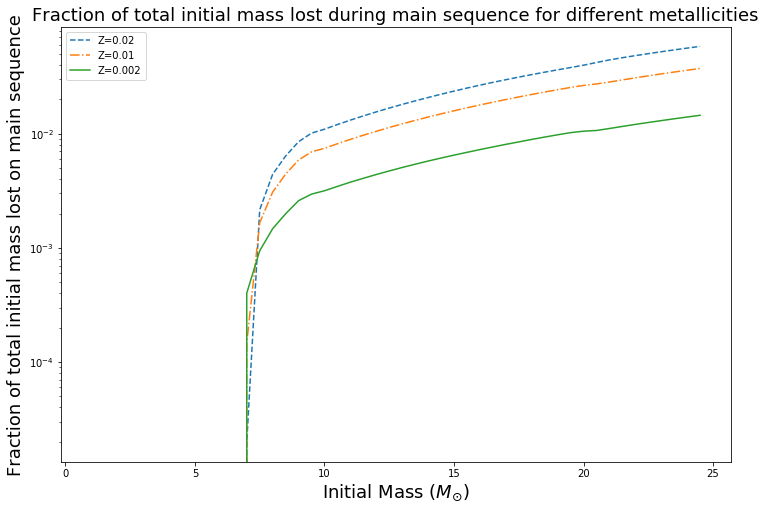

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax.plot(mass_range, fractions_z002, '--', label='Z=0.02')
ax.plot(mass_range, fractions_z001, '-.', label='Z=0.01')
ax.plot(mass_range, fractions_z0002, '-', label='Z=0.002')

ax.set_xlabel(r'Initial Mass ($M_{\odot}$)', fontsize=18)
ax.set_ylabel(r'Fraction of total initial mass lost on main sequence', fontsize=18)
ax.set_title('Fraction of total initial mass lost during main sequence for different metallicities', fontsize=18)
ax.legend()
ax.set_yscale('log')
#save_loop(name='plots/mass_loss_MS.{format}', formats=['pdf', 'png', 'eps'], bbox_inches='tight')
plt.show()